# Clustering Notebook

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_context("notebook")

import sklearn.cluster as sk_clus
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

In [2]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = shc.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

### Make Blobs of Data

In [3]:
data, y = make_blobs(n_samples=2000, n_features=3, centers=5, cluster_std=1.1)

In [4]:
df = pd.DataFrame( {'f1': data.T[0], 'f2': data.T[1], 'f3': data.T[2]})
display(df.shape)
df.head()

(2000, 3)

,f1,f2,f3
0,6.532495,-0.118680,2.521073
1,0.649412,-5.506380,-7.548471
2,-10.010532,-0.368054,8.137075
3,-6.735343,-0.224580,5.151071
4,5.628388,-1.056756,3.641579


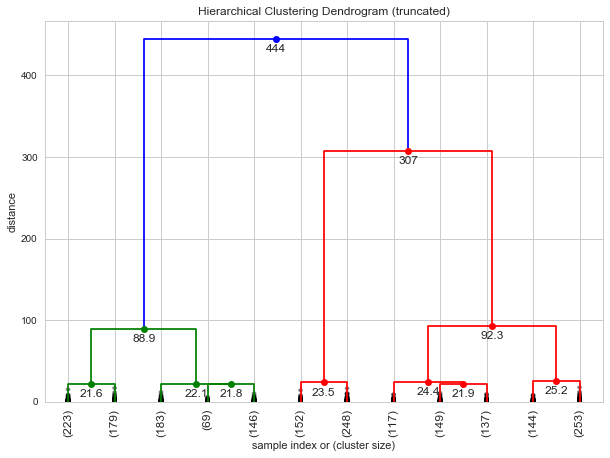

In [8]:



plt.figure(figsize=(10, 7))  

fancy_dendrogram(
    Z=linkage(df.values, 'ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

## K-Means

### K-Means: Fit + Tune

In [9]:
distortions = []
for k in range(1, 20):

    kmeans = sk_clus.KMeans(n_clusters=k, random_state=0).fit(df.values)
    distortions.append(sum(np.min(cdist(df.values, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
# kmeans.labels_

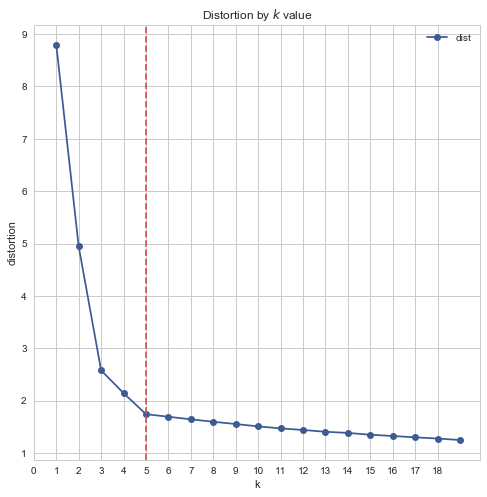

In [10]:
results = pd.DataFrame({'k': list(range(1, 20)), 'dist':distortions})

# results = results.set_index('k')
ax = results.plot(kind='line', x='k', y='dist', marker='o', markerfacecolor=sns.xkcd_rgb["denim blue"], color=sns.xkcd_rgb["denim blue"])
ax.set_xlabel('k')
ax.set_ylabel('distortion')
ax.set_xticks(list(results.index))
ax.set_title("Distortion by $k$ value ")
ax.axvline(5, color=sns.xkcd_rgb["pale red"], linestyle='--')
plt.gcf().set_size_inches(8, 8)

### K-Means: Re-train based on tuning

In [11]:
df = df[['f1', 'f2', 'f3']]
df.head()

,f1,f2,f3
0,6.532495,-0.118680,2.521073
1,0.649412,-5.506380,-7.548471
2,-10.010532,-0.368054,8.137075
3,-6.735343,-0.224580,5.151071
4,5.628388,-1.056756,3.641579


In [12]:
kmeans = sk_clus.KMeans(n_clusters=5, random_state=0).fit(df[['f1', 'f2', 'f3']].values)
df['cluster'] = kmeans.labels_

In [13]:
cc = pd.DataFrame({'x':kmeans.cluster_centers_.T[0], 
                   'y':kmeans.cluster_centers_.T[1], 
                   'z':kmeans.cluster_centers_.T[2]})


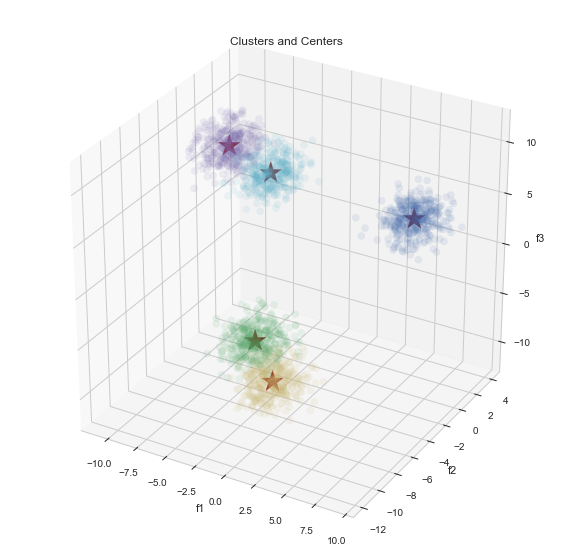

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot cluster centers
x = np.array(cc['x'])
y = np.array(cc['y'])
z = np.array(cc['z'])
ax.scatter(x,y,z, marker="*", c=sns.xkcd_rgb['dark red'], s=500, alpha=1.0)

# plot points
x = np.array(df['f1'])
y = np.array(df['f2'])
z = np.array(df['f3'])
my_cmap = ListedColormap(sns.color_palette().as_hex())
ax.scatter(x,y,z, marker="o", c=df["cluster"], s=50, cmap=my_cmap, alpha=0.1)


ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
ax.set_title("Clusters and Centers")

plt.gcf().set_size_inches(10, 10)

plt.show()

## Hierarchical Clustering

In [15]:
cust_data = pd.read_csv('./shopping_data.csv')
cust_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
cust_data["Genre"] = cust_data["Genre"].astype('category')
cust_data["Genre_Cat"] = cust_data["Genre"].cat.codes
cust_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Cat
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


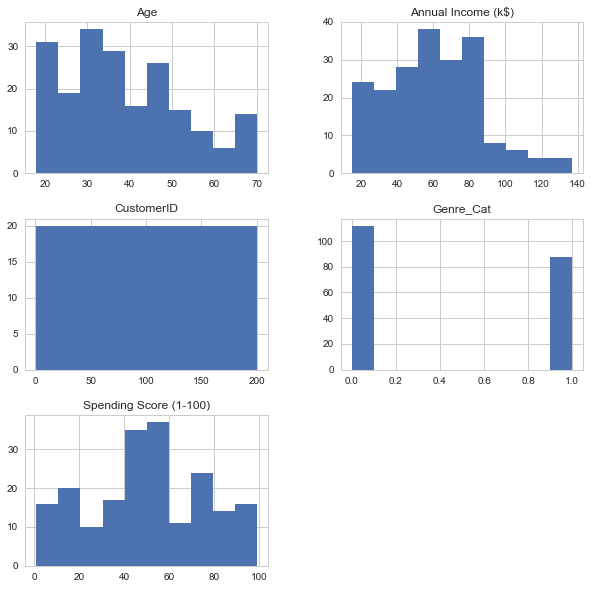

In [18]:
axes = cust_data.hist()
plt.gcf().set_size_inches(10, 10)

In [19]:
data = cust_data.iloc[:,2:-1].values
cust_data.iloc[:,2:-1].head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


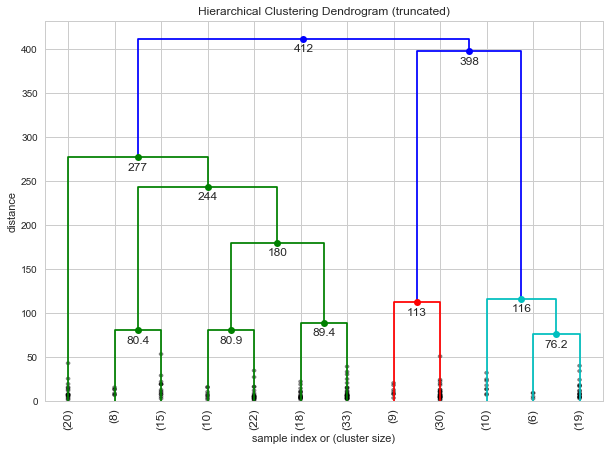

In [20]:
plt.figure(figsize=(10, 7))  

fancy_dendrogram(
    Z=linkage(data, 'ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(data)  


In [22]:
cust_data['clusters'] = clusters

In [23]:
cust_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Cat,clusters
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,4


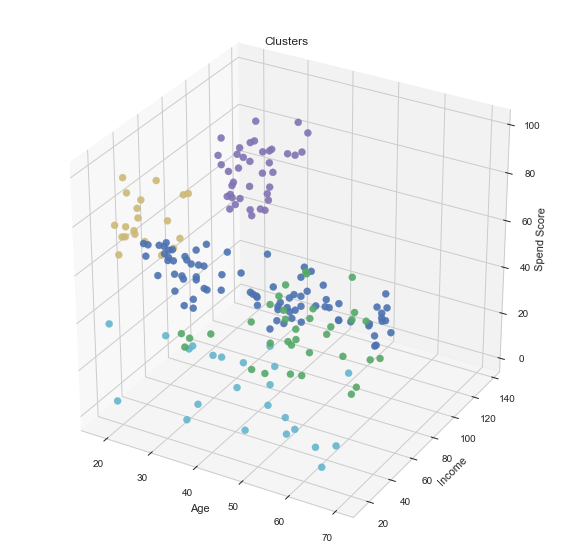

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot points
x = np.array(cust_data['Age'])
y = np.array(cust_data['Annual Income (k$)'])
z = np.array(cust_data['Spending Score (1-100)'])
my_cmap = ListedColormap(sns.color_palette().as_hex())
ax.scatter(x,y,z, marker="o", c=cust_data["clusters"], s=50, cmap=my_cmap, alpha=0.9)


ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spend Score')
ax.set_title("Clusters")

plt.gcf().set_size_inches(10, 10)

plt.show()

In [25]:
cust_data['marker'] = cust_data.apply(lambda row: '^' if row['Genre_Cat'] == 1 else 'v', axis=1)

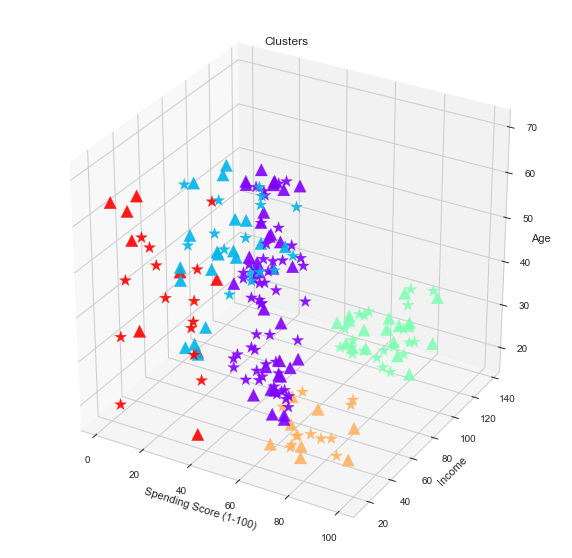

In [26]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for gender in cust_data['Genre'].unique():
    marker = '^' if gender == 'Male' else '*'
    mask = cust_data['Genre']==gender
    temp_data = cust_data[mask]
    x = np.array(temp_data['Spending Score (1-100)'])
    y = np.array(temp_data['Annual Income (k$)'])
    z = np.array(temp_data['Age'])
    c = np.array(temp_data["clusters"])
    my_cmap = ListedColormap(sns.color_palette().as_hex())

    ax.scatter(x,y,z, s=150, marker=marker, c=c, cmap='rainbow', alpha=0.9)
ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Income')
ax.set_zlabel('Age')
ax.set_title("Clusters")

plt.gcf().set_size_inches(10, 10)

plt.show()

In [27]:
import plotly.offline as po
import plotly.graph_objs as go




In [28]:
po.init_notebook_mode(connected=True)

In [29]:
temp_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Cat,clusters,marker
2,3,Female,20,16,6,0,4,v
3,4,Female,23,16,77,0,3,v
4,5,Female,31,17,40,0,4,v
5,6,Female,22,17,76,0,3,v
6,7,Female,35,18,6,0,4,v


In [30]:
traces = []
for gender in cust_data['Genre'].unique():
    opacity = 0.9 if gender == 'Male' else 0.3
    
    
    mask = cust_data['Genre']==gender
    temp_data = cust_data[mask]
    x = temp_data['Annual Income (k$)']
    y = temp_data['Spending Score (1-100)']
    z = temp_data['Age']
    c = temp_data["clusters"]
    marker = dict(size=8, color=c, colorscale='Viridis', opacity=opacity)
    line = dict(color = 'rgb(231, 99, 250)', width = 10)
    marker['line'] = None if gender == 'Male' else line
    trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=marker)
    traces.append(trace)
layout = go.Layout(margin=dict( l=0,r=0,b=0,t=0), scene={'xaxis':{'title': 'Income'}, 'yaxis':{'title': 'Spend Score'}, 'zaxis':{'title': 'Age'}})
fig = go.Figure(data=traces, layout=layout)
po.iplot(fig, filename='3d-scatter-colorscale')
  
#     my_cmap = ListedColormap(sns.color_palette().as_hex())

#     ax.scatter(x,y,z, s=150, marker=marker, c=c, cmap='rainbow', alpha=0.9)


## K-Prototype

In [32]:
cust_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Cat,clusters,marker
0,1,Male,19,15,39,1,4,^
1,2,Male,21,15,81,1,3,^
2,3,Female,20,16,6,0,4,v
3,4,Female,23,16,77,0,3,v
4,5,Female,31,17,40,0,4,v


In [36]:
data = cust_data.iloc[:,2:-2].values
cust_data.iloc[:,2:-2].head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Cat
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
cust_data.iloc[:,2:-1]

In [64]:
import kmodes.kprototypes as km

kp = km.KPrototypes(n_clusters=5, init='Huang', n_init=5, verbose=True)


In [65]:
cust_data['kp_cluster'] = kp.fit_predict(data, categorical=[3])

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 20, ncost: 101773.39471450195
Run: 1, iteration: 2/100, moves: 11, ncost: 98382.72188667356
Run: 1, iteration: 3/100, moves: 11, ncost: 96288.12182213011
Run: 1, iteration: 4/100, moves: 13, ncost: 91369.01895535324
Run: 1, iteration: 5/100, moves: 14, ncost: 82856.26798541361
Run: 1, iteration: 6/100, moves: 15, ncost: 76954.03030217886
Run: 1, iteration: 7/100, moves: 4, ncost: 76617.39861076932
Run: 1, iteration: 8/100, moves: 2, ncost: 76527.14440835718
Run: 1, iteration: 9/100, moves: 0, ncost: 76527.14440835718
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 21, ncost: 132060.45926317555
Run: 2, iteration: 2/100, moves: 30, ncost: 126064.14855389761
Run: 2, iteration: 3/100, moves: 28, ncost: 106714.27283916075
Run: 2, iteration: 4/100, moves: 22, n

In [66]:
print(kp.cluster_centroids_)


[array([[25.52173913, 26.30434783, 78.56521739],
       [45.2173913 , 26.30434783, 20.91304348],
       [40.66666667, 87.75      , 17.58333333],
       [32.69230769, 86.53846154, 82.12820513],
       [43.08860759, 55.29113924, 49.56962025]]), array([[0],
       [0],
       [1],
       [0],
       [0]])]


In [67]:
traces = []
for gender in cust_data['Genre'].unique():
    opacity = 0.9 if gender == 'Male' else 0.3
    
    
    mask = cust_data['Genre']==gender
    temp_data = cust_data[mask]
    x = temp_data['Annual Income (k$)']
    y = temp_data['Spending Score (1-100)']
    z = temp_data['Age']
    c = temp_data["kp_cluster"]
    marker = dict(size=8, color=c, colorscale='Viridis', opacity=opacity)
    line = dict(color = 'rgb(231, 99, 250)', width = 10)
    marker['line'] = None if gender == 'Male' else line
    trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=marker)
    traces.append(trace)
layout = go.Layout(margin=dict( l=0,r=0,b=0,t=0), scene={'xaxis':{'title': 'Income'}, 'yaxis':{'title': 'Spend Score'}, 'zaxis':{'title': 'Age'}})
fig = go.Figure(data=traces, layout=layout)
po.iplot(fig, filename='3d-scatter-colorscale')
  
#     my_cmap = ListedColormap(sns.color_palette().as_hex())

#     ax.scatter(x,y,z, s=150, marker=marker, c=c, cmap='rainbow', alpha=0.9)


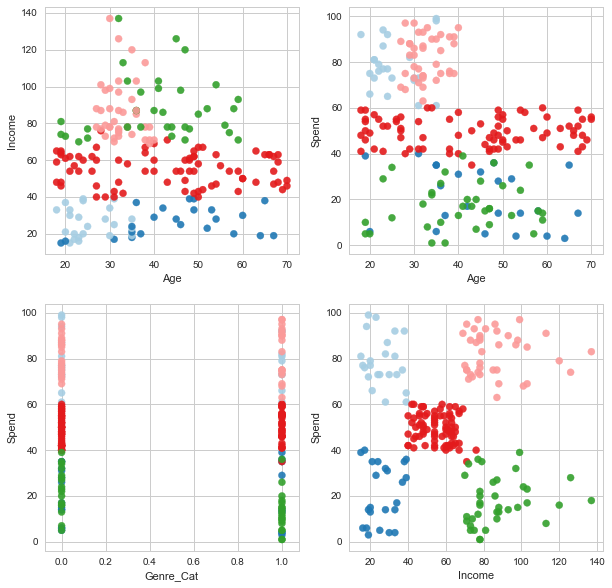

In [68]:
fig, ax = plt.subplots(2, 2)

# z = np.array(cust_data['Spending Score (1-100)'])
my_cmap = ListedColormap(sns.color_palette("Paired").as_hex())
ax[0][0].scatter(np.array(cust_data['Age']), np.array(cust_data['Annual Income (k$)']), 
                 marker="o", c=cust_data["kp_cluster"], s=50, 
                 cmap=my_cmap, alpha=0.9)
ax[0][0].set_xlabel("Age")
ax[0][0].set_ylabel("Income")

ax[0][1].scatter(np.array(cust_data['Age']), np.array(cust_data['Spending Score (1-100)']), 
                 marker="o", c=cust_data["kp_cluster"], s=50, 
                 cmap=my_cmap, alpha=0.9)
ax[0][1].set_xlabel("Age")
ax[0][1].set_ylabel("Spend")

ax[1][0].scatter(np.array(cust_data['Genre_Cat']), np.array(cust_data['Spending Score (1-100)']), 
                 marker="o", c=cust_data["kp_cluster"], s=50, 
                 cmap=my_cmap, alpha=0.9)
ax[1][0].set_xlabel("Genre_Cat")
ax[1][0].set_ylabel("Spend")


ax[1][1].scatter(np.array(cust_data['Annual Income (k$)']), np.array(cust_data['Spending Score (1-100)']), 
                 marker="o", c=cust_data["kp_cluster"], s=50, 
                 cmap=my_cmap, alpha=0.9)
ax[1][1].set_xlabel("Income")
ax[1][1].set_ylabel("Spend")


fig.set_size_inches(10,10)

## K Means on Customer Data

In [69]:
cust_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Cat,clusters,marker,kp_cluster
0,1,Male,19,15,39,1,4,^,1
1,2,Male,21,15,81,1,3,^,0
2,3,Female,20,16,6,0,4,v,1
3,4,Female,23,16,77,0,3,v,0
4,5,Female,31,17,40,0,4,v,1


In [94]:
data = cust_data.iloc[:,2:6].astype(float).values
cust_data.iloc[:,2:6].head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Cat
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [75]:
import sklearn.preprocessing as sk_pre


In [76]:
scaler = sk_pre.StandardScaler()

In [95]:
distortions = []
for k in range(1, 20):

    kmeans = sk_clus.KMeans(n_clusters=k, random_state=0).fit(data)
    distortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])
# kmeans.labels_

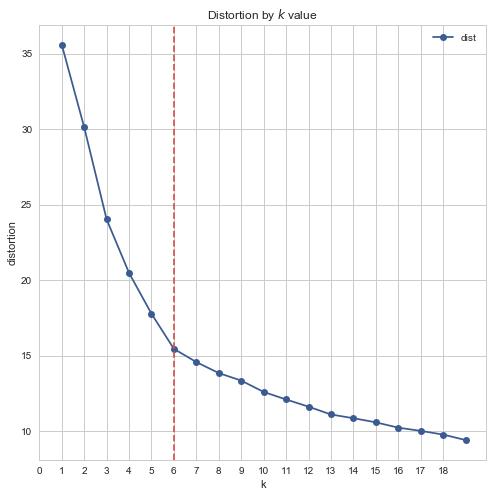

In [100]:
results = pd.DataFrame({'k': list(range(1, 20)), 'dist':distortions})

# results = results.set_index('k')
ax = results.plot(kind='line', x='k', y='dist', marker='o', markerfacecolor=sns.xkcd_rgb["denim blue"], color=sns.xkcd_rgb["denim blue"])
ax.set_xlabel('k')
ax.set_ylabel('distortion')
ax.set_xticks(list(results.index))
ax.set_title("Distortion by $k$ value ")
ax.axvline(6, color=sns.xkcd_rgb["pale red"], linestyle='--')
plt.gcf().set_size_inches(8, 8)

In [101]:
kmeans = sk_clus.KMeans(n_clusters=5, random_state=0).fit(data)


In [102]:
cust_data['kmean_cluster'] = kmeans.labels_


In [103]:
traces = []
for gender in cust_data['Genre'].unique():
    opacity = 0.9 if gender == 'Male' else 0.3
    
    
    mask = cust_data['Genre']==gender
    temp_data = cust_data[mask]
    x = temp_data['Annual Income (k$)']
    y = temp_data['Spending Score (1-100)']
    z = temp_data['Age']
    c = temp_data["kmean_cluster"]
    marker = dict(size=8, color=c, colorscale='Viridis', opacity=opacity)
    line = dict(color = 'rgb(231, 99, 250)', width = 10)
    marker['line'] = None if gender == 'Male' else line
    trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=marker)
    traces.append(trace)
layout = go.Layout(margin=dict( l=0,r=0,b=0,t=0), scene={'xaxis':{'title': 'Income'}, 'yaxis':{'title': 'Spend Score'}, 'zaxis':{'title': 'Age'}})
fig = go.Figure(data=traces, layout=layout)
po.iplot(fig, filename='3d-scatter-colorscale')
  
#     my_cmap = ListedColormap(sns.color_palette().as_hex())

#     ax.scatter(x,y,z, s=150, marker=marker, c=c, cmap='rainbow', alpha=0.9)


## Clustering using Transaction Data

In [151]:
from lifetimes.datasets import load_cdnow_summary_data_with_monetary_value

summary_with_money_value = load_cdnow_summary_data_with_monetary_value()
summary_with_money_value.head()

,frequency,recency,T,monetary_value
customer_id,,,,
1,2,30.43,38.86,22.35
2,1,1.71,38.86,11.77
3,0,0.00,38.86,0.00
4,0,0.00,38.86,0.00
5,0,0.00,38.86,0.00


In [152]:
import scipy.stats as sc_stats


In [154]:
summary_with_money_value.describe()

,frequency,recency,T,monetary_value
count,2357.000000,2357.000000,2357.000000,2357.000000
mean,1.042427,6.845787,32.715829,14.079045
std,2.190014,10.731400,3.326906,25.760960
min,0.000000,0.000000,27.000000,0.000000
25%,0.000000,0.000000,29.860000,0.000000
50%,0.000000,0.000000,32.710000,0.000000
75%,1.000000,12.000000,35.430000,21.360000
max,29.000000,38.430000,38.860000,299.630000


In [224]:
df_scaled

Power_divergenceResult(statistic=array([         nan,          nan, 799.31053969,          nan,
                nan,          nan,          nan,   0.        ]), pvalue=array([nan, nan,  1., nan, nan, nan, nan,  1.]))

In [227]:
def freeman_tukey(df):
    df_scaled = df.copy()
    for col in df.columns:
        df_scaled[col] = np.power(df[col], 0.5) + np.power(df[col]  + 1.0, 0.5)
    return df_scaled.values

In [233]:
from tabulate import tabulate

(2357, 8) (2357, 8)


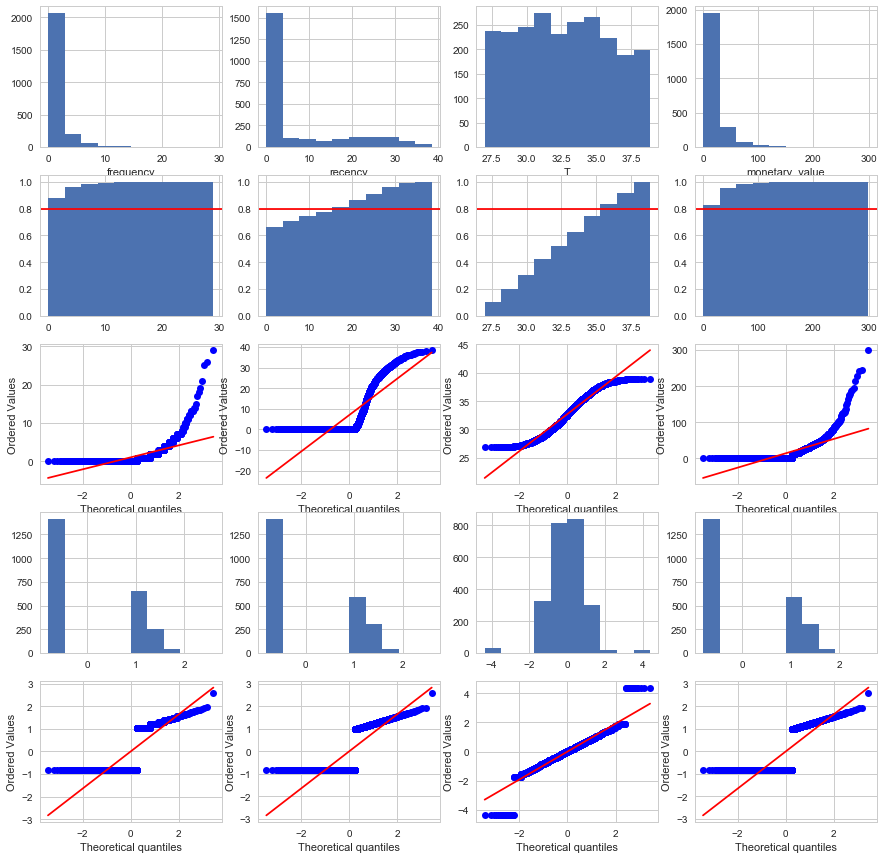

In [332]:
fig, ax = plt.subplots(5, 4)
fig.set_size_inches(15, 6*2.5)
df = summary_with_money_value

print(df_scaled.shape, df.shape)
# print(tabulate(df_scaled, headers=df.columns, tablefmt='psql'))

# df_scaled = sc_stats.power_divergence(df.values, lambda_=-0.5)
# df_scaled = freeman_tukey(pd.DataFrame(df_scaled, columns=df.columns))
# df_scaled = freeman_tukey(df)
df_scaled = sk_pre.StandardScaler(copy=True).fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
# print(tabulate(df_scaled, headers=df.columns, tablefmt='psql'))
# df_scaled = sk_pre.QuantileTransformer(output_distribution='normal').fit_transform(df.values)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
# df_scaled = sc_stats.boxcox(df.values) #sk_pre.StandardScaler(d).fit_transform()
for i, col in zip(range(4), df.columns):
    ax[0][i].hist(np.array(df[col]))
    ax[0][i].set_xlabel(col)
    ax[1][i].hist(np.array(df[col]), cumulative=True, density=True)
    ax[1][i].axhline(0.8, color='red')
#     stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)
    sc_stats.probplot(np.array(df[col]), plot=ax[2][i])
    ax[2][i].set_title('')
    df_scaled[col].hist(ax=ax[3][i])
#     ax[3][i].hist(np.array(df_scaled.iloc[:,i:i+1]))
    sc_stats.probplot(df_scaled[col].values, plot=ax[4][i])
    ax[4][i].set_title('')

    

In [333]:
traces = []

x = df['frequency']
y = df['recency']
z = df['monetary_value']
#c = temp_data["kmean_cluster"]
marker = dict(size=8, opacity=opacity)
trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=marker)
traces.append(trace)
layout = go.Layout(margin=dict( l=0,r=0,b=0,t=0), scene={'xaxis':{'title': 'Freq'}, 
                                                         'yaxis':{'title': 'Recency'}, 
                                                         'zaxis':{'title': 'monetary'}})
fig = go.Figure(data=traces, layout=layout)
po.iplot(fig, filename='3d-scatter-colorscale')


In [334]:
traces = []

x = [v[0] for v in df_scaled.iloc[:,0:1].values]
y = [v[0] for v in df_scaled.iloc[:,1:2].values]
z = [v[0] for v in df_scaled.iloc[:,3:4].values]
#c = temp_data["kmean_cluster"]
marker = dict(size=8, opacity=opacity)
trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=marker)
traces.append(trace)
layout = go.Layout(margin=dict( l=0,r=0,b=0,t=0), scene={'xaxis':{'title': 'Freq'}, 
                                                         'yaxis':{'title': 'Recency'}, 
                                                         'zaxis':{'title': 'monetary'}})
fig = go.Figure(data=traces, layout=layout)
po.iplot(fig, filename='3d-scatter-colorscale')


(2357, 4)

In [335]:
import kmodes.kprototypes as km

kp = km.KPrototypes(n_clusters=5, init='Huang', n_init=5, verbose=True)


In [336]:
df.head()

,frequency,recency,T,monetary_value,kp_cluster,km_cluster,km_cluster_mapped_kp,score
customer_id,,,,,,,,
1,2,30.43,38.86,22.35,1,1,3,1
2,1,1.71,38.86,11.77,1,4,3,1
3,0,0.00,38.86,0.00,0,0,0,1
4,0,0.00,38.86,0.00,0,0,0,1
5,0,0.00,38.86,0.00,0,0,0,1


In [338]:
df.head()
data = df_scaled[['frequency', 'recency', 'monetary_value']].values
labels = kp.fit_predict(data, categorical=[0, 1])

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 162, ncost: 559.6576583729528
Run: 1, iteration: 2/100, moves: 11, ncost: 559.6568454368132
Run: 1, iteration: 3/100, moves: 0, ncost: 559.6568454368132
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing cl

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
In

In [339]:
df['kp_cluster'] = labels

In [340]:
traces = []

x = df['frequency']
y = df['recency']
z = df['monetary_value']
c = df["kp_cluster"]
marker = dict(size=4, color=c, colorscale='Viridis', opacity=0.7)
trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', hovertext=c, marker=marker)
traces.append(trace)
layout = go.Layout(margin=dict( l=0,r=0,b=0,t=0), scene={'xaxis':{'title': 'Freq'}, 
                                                         'yaxis':{'title': 'Recency'}, 
                                                         'zaxis':{'title': 'monetary'}})
fig = go.Figure(data=traces, layout=layout)
po.iplot(fig, filename='3d-scatter-colorscale')


In [341]:
traces = []

x = df_scaled['frequency']
y = df_scaled['recency']
z = df_scaled['monetary_value']
c = df["kp_cluster"]
marker = dict(size=4, color=c, colorscale='Viridis', opacity=0.7)
trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', hovertext=c, marker=marker)
traces.append(trace)
layout = go.Layout(margin=dict( l=0,r=0,b=0,t=0), scene={'xaxis':{'title': 'Freq'}, 
                                                         'yaxis':{'title': 'Recency'}, 
                                                         'zaxis':{'title': 'monetary'}})
fig = go.Figure(data=traces, layout=layout)
po.iplot(fig, filename='3d-scatter-colorscale')


In [342]:
kmeans = sk_clus.KMeans(n_clusters=5).fit(data)
df['km_cluster'] = kmeans.labels_

In [343]:
traces = []

x = df['frequency']
y = df['recency']
z = df['monetary_value']
c = df["km_cluster"]
marker = dict(size=4, color=c, colorscale='Viridis', opacity=0.7)
trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', hovertext=c, marker=marker)
traces.append(trace)
layout = go.Layout(margin=dict( l=0,r=0,b=0,t=0), scene={'xaxis':{'title': 'Freq'}, 
                                                         'yaxis':{'title': 'Recency'}, 
                                                         'zaxis':{'title': 'monetary'}})
fig = go.Figure(data=traces, layout=layout)
po.iplot(fig, filename='3d-scatter-colorscale')


In [344]:
traces = []

x = df_scaled['frequency']
y = df_scaled['recency']
z = df_scaled['monetary_value']
c = df["km_cluster"]
marker = dict(size=4, color=c, colorscale='Viridis', opacity=0.4)
trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', hovertext=c, marker=marker)
traces.append(trace)
layout = go.Layout(margin=dict( l=0,r=0,b=0,t=0), scene={'xaxis':{'title': 'Freq'}, 
                                                         'yaxis':{'title': 'Recency'}, 
                                                         'zaxis':{'title': 'monetary'}})
fig = go.Figure(data=traces, layout=layout)
po.iplot(fig, filename='3d-scatter-colorscale')
